# Import

In [ ]:
import sys
import os
sys.path.append("../src")

from utils import *
from mitigation_fct import *
from distance import *
from Gems_Wasserstein import *
from sampling import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy import stats
import time
import json

result_path = '../Result/'
folders_name = os.listdir(result_path)
dic_arr_results = {}
for folder in folders_name:
    if (folder[-4:] != '.csv') and (folder[-5:] != '.json'):
        print(folder)
        files = os.listdir(result_path + folder)
        if files != []:
            dic_arr_results[folder] = {}
        for file in files:
            if file[-4:] == '.npy':
                try:
                    arr = np.load(file = result_path + folder + '/' + file)
                    dic_arr_results[folder][file[:-4]] = arr
                    print(f'successfuly loaded {file}')
                except:
                    print(f'error with the following : {file}')

dic_sample_size_folder = {
    'ADULT'   : [125, 500, 1000, 1500, 2000, 2500],
}
folders_name = dic_sample_size_folder.keys()
method_list = ['Grad_reg_me', 'Grad_reg_nu', 'Grad_la_me', 'Grad_la_nu', 'Miti_mod_SF', 'Miti_sampling_X', 'Miti_Gems_number', 'Miti_Gems_mean']

dic_threshold = {}
for folder in dic_sample_size_folder.keys():
    dic_threshold[folder] = {}
    for n_sample in dic_sample_size_folder[folder]:
        dic_threshold[folder][str(n_sample)] = {}

ADULT
successfuly loaded DI.npy
successfuly loaded Grad_la_me.npy
successfuly loaded Grad_la_nu.npy
successfuly loaded Grad_reg_me.npy
successfuly loaded Grad_reg_nu.npy
successfuly loaded Miti_Gems_mean.npy
successfuly loaded Miti_Gems_number.npy
successfuly loaded Miti_grad.npy
successfuly loaded Miti_grad_look_alike.npy
successfuly loaded Miti_mod_SF.npy
successfuly loaded Miti_sampling_X.npy
successfuly loaded original.npy
successfuly loaded threshold.npy
ASC_EMP
successfuly loaded DI.npy
successfuly loaded Grad_la_me.npy
successfuly loaded Grad_la_nu.npy
successfuly loaded Grad_reg_me.npy
successfuly loaded Grad_reg_nu.npy
successfuly loaded Miti_Gems_mean.npy
successfuly loaded Miti_Gems_number.npy
successfuly loaded Miti_mod_SF.npy
successfuly loaded Miti_sampling_X.npy
successfuly loaded original.npy
successfuly loaded threshold.npy
successfuly loaded X_number_column.npy
ASC_INC
successfuly loaded DI.npy
successfuly loaded Grad_la_me.npy
successfuly loaded Grad_la_nu.npy
succes

# Compute the thresholds for every criteria

In [5]:
folder = 'ADULT'
iter_precision = 50
max_wass_iter = 1e7

On all the dataset: (X,S,Y)

In [6]:
for n_sample in dic_sample_size_folder[folder]:
    print(folder, n_sample)
    arr_original   = dic_arr_results[folder]['original']

    list_KL = []
    list_W  = []
    list_MMD = []

    for i in range(iter_precision):
        sample = sample_arr(arr_original, 
                            n_sample)
        list_KL.append(KL_arr(arr_P = arr_original, 
                                arr_Q = sample))
        list_W.append(Wasserstein(arr_original, 
                                  sample, 
                                  numItermax=max_wass_iter))
        list_MMD.append(mmd_rbf(arr_original, sample))

    KL_values = np.array(list_KL)
    KL_goal = np.mean(KL_values) + 1.96 * np.std(KL_values)
    dic_threshold[folder][str(n_sample)]['KL_A'] = KL_goal
    
    W_values = np.array(list_W)
    W_goal = np.mean(W_values) + 1.96 * np.std(W_values)
    dic_threshold[folder][str(n_sample)]['W_A'] = W_goal

    MMD_goal = np.array(list_MMD)
    MMD_goal = np.mean(MMD_goal) + 1.96 * np.std(MMD_goal)
    dic_threshold[folder][str(n_sample)]['MMD_A'] = MMD_goal

    print(KL_goal, W_goal, MMD_goal)


ADULT 125
0.8776366219684689 3.566678809983446 0.00872072211396354
ADULT 500
0.6537096912082174 2.2712729713391444 0.0019275583849245475
ADULT 1000
0.45787072854710514 1.6820237885441525 0.0008848957606726446
ADULT 1500
0.3223943921308931 1.347959061352562 0.0005209950024535183
ADULT 2000
0.22253746544314107 1.1094110493518994 0.00032939312337177247
ADULT 2500
0.14704554091789304 0.8939939218654457 0.00021876297682218906


Only on the sensitive variable: (S,Y)

In [7]:
for n_sample in dic_sample_size_folder[folder]:
    print(folder, n_sample)
    arr_original   = dic_arr_results[folder]['original'][:,-2:]

    list_KL = []
    list_W  = []
    list_MMD = []

    for i in range(iter_precision):
        sample = sample_arr(arr_original, 
                            n_sample)
        list_KL.append(KL_arr(arr_P = arr_original, 
                                arr_Q = sample))
        list_W.append(Wasserstein(arr_original, 
                                  sample, 
                                  numItermax=max_wass_iter))
        list_MMD.append(mmd_rbf(arr_original, sample))
                                
    KL_values = np.array(list_KL)
    KL_goal = np.mean(KL_values) + 1.96 * np.std(KL_values)
    dic_threshold[folder][str(n_sample)]['KL_P'] = KL_goal

    W_values = np.array(list_W)
    W_goal = np.mean(W_values) + 1.96 * np.std(W_values)
    dic_threshold[folder][str(n_sample)]['W_P'] = W_goal

    MMD_goal = np.array(list_MMD)
    MMD_goal = np.mean(MMD_goal) + 1.96 * np.std(MMD_goal)
    dic_threshold[folder][str(n_sample)]['MMD_P'] = MMD_goal.item()

    print(KL_goal, W_goal, MMD_goal)


ADULT 125
0.028947535065812772 0.11436367404993711 0.010135541321434849
ADULT 500
0.007933670525592951 0.058815108502806926 0.00277213659376559
ADULT 1000
0.0024409511679871817 0.03317158995750018 0.0008751860053615118
ADULT 1500
0.0017975630766743074 0.027515123968237458 0.0005346836990692132
ADULT 2000
0.0012789719876908049 0.022854306323200735 0.00041264575363039843
ADULT 2500
0.000904168248249317 0.020455697502839508 0.0003072505947958307


# Highest undetected

##### Function from highest undectected fair-washing notebook but only for adult and fewer methods

In [ ]:
def give_r_proba(number_simu = 100,
                 S_index = -2,
                 Y_index = -1):
    
    '''
    This function gives the results for each DI thresholds, datasets and methods
    '''

    ##Preparation of all mitigation fonctions
    mitigation_fct_S = lambda arr_original, **kwargs : find_sampling_wasserstein_DI(arr = arr_original,
                                                                                    S_index = S_index,
                                                                                    Y_index = Y_index,
                                                                                    **kwargs,
                                                                                    )[0]
    
    mitigation_fct_Ge = lambda arr_original, **kwargs : Gems_fair_mitigation_arr(arr = arr_original,
                                                                                 S_column_index = S_index,
                                                                                 Pred_column_index = Y_index,
                                                                                 **kwargs,
                                                                                 )
    
    dic_method_fct = {
        'M_W(XSŶ)'                   : mitigation_fct_S,
        'Entropic_balanced'          : lambda **kwargs : mitigation_fct_Ge(delta_type = 'number', **kwargs),
        'Entropic_proportional'      : lambda **kwargs : mitigation_fct_Ge(delta_type = 'mean'  , **kwargs),
    }

    ##Iterate the results for every method
    df_result_all_methods = pd.DataFrame({})
    method_list = list(dic_method_fct.keys())
    method_list.reverse()
    for method in tqdm(method_list):
        print(method)
        df_result = give_r_proba_for_a_method(fct = dic_method_fct[method],
                                              number_simu = number_simu,
                                              is_entropic_proj = method in ['Entropic_balanced', 'Entropic_proportional'])
        df_result['method'] = method
        df_result_all_methods = pd.concat([df_result_all_methods, df_result], axis = 0)
        df_result_all_methods.to_csv('./../Result/highest_results_MMD_' + str(number_simu) + '.csv')

    return df_result_all_methods
        
def give_r_proba_for_a_method(fct, 
                              number_simu = 100, 
                              is_entropic_proj = False,
                              S_index = -2, 
                              Y_index = -1,
                              ):
    '''
    for a specific method, this function gives the results for each DI thresholds and for every dataset
    '''
        
    df_result = pd.DataFrame({})

    folder = 'ADULT'

    arr_original = dic_arr_results[folder]['original']
    prob_threshold = torch.tensor(dic_arr_results[folder]['threshold'])

    mitigation_fct = lambda DI : fct(arr_original = arr_original,
                                        threshold = DI,
                                        DI = DI,
                                        DI_target = DI,
                                        prob_threshold = prob_threshold,
                                        folder = folder,
                                        )
    for n_sample in dic_sample_size_folder[folder]:
        print(folder, n_sample)
        DI_max_start = 1
        
        KL_A_cdt  = dic_threshold[folder][str(n_sample)]['KL_A']
        W_A_cdt   = dic_threshold[folder][str(n_sample)]['W_A']
        KL_P_cdt  = dic_threshold[folder][str(n_sample)]['KL_P']
        W_P_cdt   = dic_threshold[folder][str(n_sample)]['W_P']
        MMD_A_cdt = dic_threshold[folder][str(n_sample)]['MMD_A']
        MMD_P_cdt = dic_threshold[folder][str(n_sample)]['MMD_P']
        df =  see_highest_DI_undetected_proba(arr_original   = arr_original,
                                                mitigation_fct = mitigation_fct,
                                                KL_A_cdt    = KL_A_cdt,
                                                W_A_cdt     = W_A_cdt,
                                                MMD_A_cdt   = MMD_A_cdt,
                                                KL_P_cdt    = KL_P_cdt,
                                                W_P_cdt     = W_P_cdt,
                                                MMD_P_cdt   = MMD_P_cdt,
                                                number_simu = number_simu,
                                                n_sample    = n_sample,
                                                DI          = DI_max_start,
                                                is_entropic_proj  = is_entropic_proj,
                                                S_index           = S_index, 
                                                Y_index           = Y_index,
                                                )

        df_result = pd.concat([df_result, df], axis = 0)
    return df_result


def see_highest_DI_undetected_proba(arr_original,
                                    mitigation_fct,
                                    KL_A_cdt,
                                    W_A_cdt,
                                    MMD_A_cdt,
                                    KL_P_cdt,
                                    W_P_cdt,
                                    MMD_P_cdt,
                                    number_simu = 50,
                                    n_sample = 2000,
                                    DI = 0.75,
                                    is_entropic_proj = False,
                                    S_index = -2, 
                                    Y_index = -1,
                                    ):
    '''
    for a specific method and a specific dataset, this function gives the results for each DI thresholds
    '''
    #print('entered see highest')
    max_wass_iter = 1e7
    threshold_pvalue = 0.05
    DI_start = DI_fct(arr_original, 
                    S_index = S_index, 
                    Y_index = Y_index,
                    )
    df_all = pd.DataFrame({})
    i = 0
    '''print(f'the DI is {np.round(DI, 3)}, the DI_start is {DI_start}')'''
    while (np.round(DI, 3) >= DI_start):
        print(DI)
        arr_miti = mitigation_fct(DI = DI + 0.001)
        indexs = np.arange(len(arr_miti))
        lambdas = arr_miti[:,-1]  
        S0_index_P = arr_original[:,S_index] == 0
        YS0_P, YS1_P = arr_original[S0_index_P, Y_index], arr_original[~S0_index_P, Y_index]

        list_sample_time, list_DI_sample, list_sample_test_failed = np.zeros(number_simu), np.zeros(number_simu), []

        for i in range(number_simu):
            start_time = time.time()
            if is_entropic_proj:
                
                indexs_choice = np.random.choice(indexs,
                                                size = n_sample,
                                                replace = False,
                                                p = lambdas)
                    
                sample = arr_original[indexs_choice]
            else:
                sample = sample_arr(arr_miti, 
                                n_sample)
            
            DI_sample = DI_fct(sample, 
                               S_index = S_index, 
                               Y_index = Y_index)
            
            list_DI_sample[i] = DI_sample

            if DI_sample > DI:

                S0_index_sample = sample[:,S_index] == 0
                YS0_s = sample[S0_index_sample, Y_index]
                YS1_s = sample[~S0_index_sample, Y_index]
                KS1_sample = stats.ks_2samp(YS1_P, YS1_s).pvalue
                KS0_sample = stats.ks_2samp(YS0_P, YS0_s).pvalue

                if min(KS0_sample, KS1_sample) > threshold_pvalue:
                     
                    KL_P_sample = KL_arr(arr_P = arr_original[:,-2:],
                                     arr_Q = sample[:,-2:])
                
                    if KL_P_sample < KL_P_cdt:

                        KL_A_sample = KL_arr(arr_P = arr_original,
                                            arr_Q = sample)
                        
                        if KL_A_sample < KL_A_cdt:

                            MMD_P_sample = mmd_rbf(arr_original[:,-2:], sample[:,-2:])

                            if MMD_P_sample < MMD_P_cdt:

                                MMD_A_sample = mmd_rbf(arr_original, sample)

                                if MMD_A_sample < MMD_A_cdt:

                                    W_P_sample = Wasserstein(arr_original[:,-2:], 
                                                            sample[:,-2:],
                                                            numItermax = max_wass_iter)

                                    if W_P_sample < W_P_cdt :

                                        W_A_sample = Wasserstein(arr_original, 
                                                                sample,
                                                                numItermax = max_wass_iter)
                                        
                                        if W_A_sample < W_A_cdt:
                                            list_sample_test_failed.append('None')
                                        else:
                                            list_sample_test_failed.append('W_A')
                                    else:
                                        list_sample_test_failed.append('W_P')
                                else:
                                    list_sample_test_failed.append('MMD_A')
                            else:
                                list_sample_test_failed.append('MMD_P')
                        else:
                            list_sample_test_failed.append('KL_P')
                    else:
                        list_sample_test_failed.append('KL_A')
                else:
                    list_sample_test_failed.append('KS')
            else:
                list_sample_test_failed.append('DI')

            end_time = time.time()
            elipsed_time = end_time - start_time
            list_sample_time[i] = elipsed_time

        DI -= 0.05
        df = pd.DataFrame({'DI_sample' : list_DI_sample, 
                           'test_result_rejected' : list_sample_test_failed, 
                           'DI_Qt' : [DI] * number_simu,
                           'n_sample' : [n_sample] * number_simu,
                           'sampling_test_time' : list_sample_time,
                           'iter_number' : np.arange(1,number_simu + 1, 1)})
        df_all = pd.concat([df_all, df], axis = 0)
    return df_all

## utilisation here

In [9]:
df = give_r_proba(number_simu = 50,
                    S_index = -2,
                    Y_index = -1)

  0%|          | 0/3 [00:00<?, ?it/s]

Entropic_proportional
ADULT 125
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 500
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 1000
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 1500
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999

 33%|███▎      | 1/3 [18:11<36:23, 1091.92s/it]

Entropic_balanced
ADULT 125
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 500
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 1000
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 1500
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.49999999

 67%|██████▋   | 2/3 [36:52<18:28, 1108.77s/it]

M_W(XSŶ)
ADULT 125
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 500
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 1000
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996
0.4499999999999996
0.39999999999999963
0.34999999999999964
0.29999999999999966
ADULT 1500
1
0.95
0.8999999999999999
0.8499999999999999
0.7999999999999998
0.7499999999999998
0.6999999999999997
0.6499999999999997
0.5999999999999996
0.5499999999999996
0.4999999999999996


100%|██████████| 3/3 [1:07:51<00:00, 1357.21s/it]


In [10]:
df_r = df[df.test_result_rejected == 'None'].groupby(['method', 'n_sample']).agg({
    'DI_sample' : 'max'
}).reset_index()
list_method = ['M_W(XSŶ)', 'Entropic_balanced', 'Entropic_proportional']

l_d = []
l_s_z = []
l_m = []
l_d_s = []
for m in range(len(list_method)):
    l_d_s.append([])
for d in ['ADULT']:
    for s_z in dic_sample_size_folder[d]:
        l_d.append(d)
        l_s_z.append(s_z)
        for count, m in enumerate(list_method):
            try:
                l_d_s[count].append(min(df_r[ (df_r.method == m) & (df_r.n_sample == s_z)].DI_sample.item(), 1))
            except:
                l_d_s[count].append(float('nan'))
df_r_final = pd.DataFrame({'Dataset' : l_d, 'Sample size' : l_s_z})#'Method' : l_m, 'Highest Sample DI' : l_d_s
for count, m in enumerate(list_method):
    df_r_final[m] = l_d_s[count]
df_r_final

,Dataset,Sample size,M_W(XSŶ),Entropic_balanced,Entropic_proportional
0,ADULT,125,0.908084,0.908084,0.889286
1,ADULT,500,0.546814,0.558923,0.551282
2,ADULT,1000,0.420601,0.425592,0.410872
3,ADULT,1500,0.398471,0.405924,0.389514
4,ADULT,2000,0.389812,0.386189,0.375653
5,ADULT,2500,0.358556,0.371239,0.363455


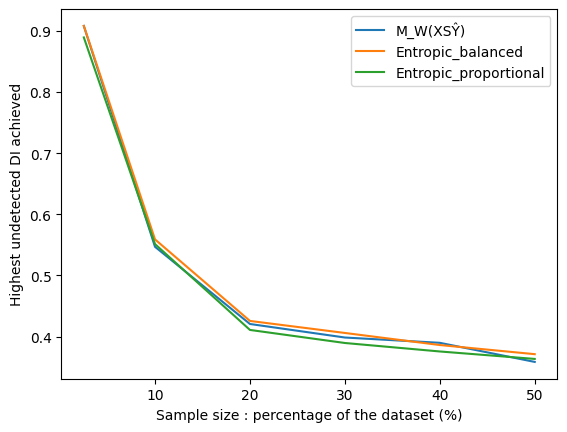

In [11]:
figure, ax = plt.subplots(1,1)
ax.plot(df_r_final['Sample size']/50, df_r_final['M_W(XSŶ)'], label = 'M_W(XSŶ)')
ax.plot(df_r_final['Sample size']/50, df_r_final['Entropic_balanced'], label = 'Entropic_balanced')
ax.plot(df_r_final['Sample size']/50, df_r_final['Entropic_proportional'], label = 'Entropic_proportional')
ax.set_ylabel('Highest undetected DI achieved')
ax.set_xlabel('Sample size : percentage of the dataset (%)')
ax.legend()

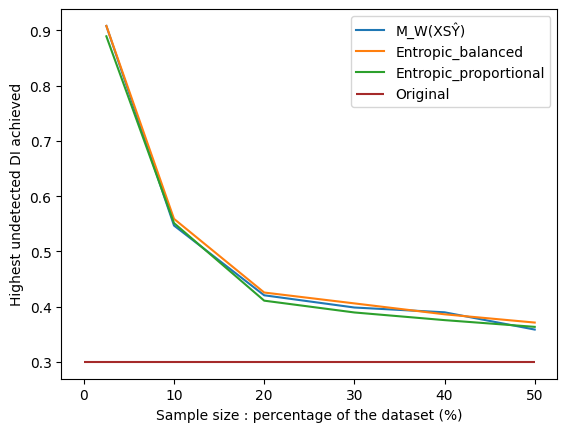

In [13]:
figure, ax = plt.subplots(1,1)
ax.plot(df_r_final['Sample size']/50, df_r_final['M_W(XSŶ)'], label = 'M_W(XSŶ)')
ax.plot(df_r_final['Sample size']/50, df_r_final['Entropic_balanced'], label = 'Entropic_balanced')
ax.plot(df_r_final['Sample size']/50, df_r_final['Entropic_proportional'], label = 'Entropic_proportional')
ax.hlines(xmin = 0, xmax=50, y = 0.3, label = 'Original', colors='brown')
ax.set_ylabel('Highest undetected DI achieved')
ax.set_xlabel('Sample size : percentage of the dataset (%)')
ax.legend()
plt.show()